<a href="https://colab.research.google.com/github/Ying-Yuan07/TensorFlowLearn/blob/main/%E5%8D%95%E5%8F%98%E9%87%8F1%E9%A6%99%E7%9A%82%E9%94%80%E5%94%AE%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


RMSE:51.435


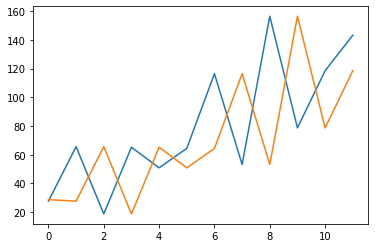

In [ ]:
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
"""https://blog.csdn.net/iyangdi/article/details/77853055
    这个算法并没有什么用，只是求了两个数组之间的标准差
    我们强行粗犷的把test数组中第n-1个元素变成了预测数组predictions中的第n个元素，作为测试结果来使用
    最后计算了了test数组和predictions数组之间的标准差，当做预测效果的评估
    所以第一节毫无意义"""

# 加载数据
def parser(x):
    return datetime.strptime(x, '%Y/%m/%d')


series = read_csv('./sample_data/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,
                  date_parser=parser)

# 分成训练和测试集合，前24列给训练集，后12行给测试集
X = series.values
train, test = X[0:-12], X[-12:]

'''
步进验证模型:
其实相当于已经用train训练好了模型
之后每一次添加一个测试数据进来
1、训练模型
2、预测一次，并保存预测结构，用于之后的验证
3、加入的测试数据作为下一次迭代的训练数据
'''
#把数组train赋值给一个history列表
history = [x for x in train]
#创建一个predictions列表，这个列表记录了观测值，创建一个predictions数组中第n个元素，对应test数组中第n-1个元素
predictions = list()
for i in range(len(test)):
    predictions.append(history[-1])  # history[-1],就是执行预测，这里我们只是假设predictions数组就是我们预测的结果
    history.append(test[i])  # 将新的测试数据加入模型

# 预测效果评估
rmse = sqrt(mean_squared_error(test, predictions))#返回的结果是测试数组test，和观测数组predictions的标准差，https://www.cnblogs.com/nolonely/p/7009001.html
print('RMSE:%.3f' % rmse)

# 画出预测+观测值
pyplot.plot(test)#测试数组
pyplot.plot(predictions)#观测数组
pyplot.show()

# New Section